In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置主题
plt.style.use('ggplot')


[ 9.42919819 10.20595626]


Text(0.5, 1.0, 'GMV均值差异分布图')

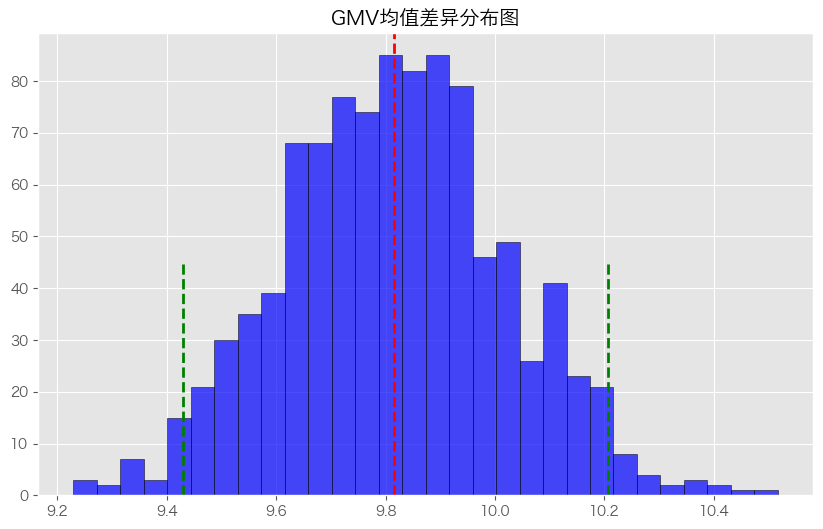

In [30]:
 # 数据生成
# GMV
gmv_control = np.random.normal(100, 10, 5000)
gmv_treat = np.random.normal(110, 10, 5000)
# 绘制GMV指标差异分布图
x = []
for i in range(1000):
    gmv_control_sample = np.random.choice(gmv_control, 5000, replace=True).mean()
    gmv_treat_sample = np.random.choice(gmv_treat, 5000, replace=True).mean()
    x.append(gmv_treat_sample - gmv_control_sample)
mean_diff = np.array(x)

plt.figure(figsize=(10,6))
plt.hist(x, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_diff.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.quantile(mean_diff, 0.975), 0, 0.5, color='green', linestyle='dashed', linewidth=2)
plt.axvline(np.quantile(mean_diff, 0.025), 0, 0.5, color='green', linestyle='dashed', linewidth=2),
print(np.quantile(mean_diff, [0.025, 0.975]))
plt.title('GMV均值差异分布图')

In [33]:
mean_diff = gmv_treat.mean() - gmv_control.mean()
var_diff = gmv_treat.var()/len(gmv_treat) + gmv_control.var()/len(gmv_control)
z_score = mean_diff / np.sqrt(var_diff)
ci_low, ci_upp = scipy.stats.norm.ppf(0.025, loc=0, scale=1), scipy.stats.norm.ppf(0.975, loc=0, scale=1),
print(var_diff)
print(mean_diff - ci_upp * np.sqrt(var_diff), mean_diff + ci_upp * np.sqrt(var_diff))

0.04000871018447503
9.422971803332013 10.2070427507411


In [32]:
ci_low, ci_upp

(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

In [ ]:
stats.kstest()

Signature:
stats.kstest(
    rvs,
    cdf,
    args=(),
    N=20,
    alternative='two-sided',
    method='auto',
    *,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for
goodness of fit.

The one-sample test compares the underlying distribution F(x) of a sample
against a given distribution G(x). The two-sample test compares the
underlying distributions of two independent samples. Both tests are valid
only for continuous distributions.

Parameters
----------
rvs : str, array_like, or callable
    If an array, it should be a 1-D array of observations of random
    variables.
    If a callable, it should be a function to generate random variables;
    it is required to have a keyword argument `size`.
    If a string, it should be the name of a distribution in `scipy.stats`,
    which will be used to generate random variables.
cdf : str, array_like or callable
    If array_like, it should be a 1-D a

In [2]:
data = np.random.normal(0, 1, 1000)

In [6]:
data.var(ddof=1),data.std(ddof=1)

(np.float64(0.9639014710248563), np.float64(0.9817848394759701))

In [5]:
((data - data.mean())**2).sum()/(data.shape[0]-1)

np.float64(0.9639014710248563)